# PENTRU LORENA:

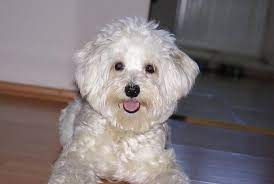


CE AM FACUT NOU:
* AM STERS TOT CE INSEAMNA OBIECT TEXT CA SCRIE IN CARTE CA E MAI USOR ASA (NU MAI AVEM NUMELE DE LA COLOANE AVEM DOAR ID-UL) 
* AM  PLOTAT HISTOGRAMELE SI  ALEA REPREZINTA NUMARUL RAPORTAT LA NUMARUL TOTAL SAU CEVA DE ENTRY-URI GEN
* TREBUIE SA MAI VERIFICI DACA AM DAT DROP LA TOT CA NU-S SIGURA

# Description and problem

  Problem description: You are a pet lover and you want to find the perfect pair of paws to walk around your house. There are so many animals in our Animal Rescue Service, but some of them have a little hard time in finding their way home. 

Task:  We would like to help our pets to find a loving home, therefore we want to create a model that will be able predict a pet's speed adoption. In this way we will be able to give each pet a nice loving home. 

# Importing data

In [50]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from sklearn.preprocessing import OrdinalEncoder

import io

In [53]:
# read from local file 
uploaded = files.upload()

# Read CSV data using pandas 
# The data is read in a DataFrame 
trainFrame = pd.read_csv(io.BytesIO(uploaded['train.csv']))
breedLabelsFrame = pd.read_csv(io.BytesIO(uploaded['breed_labels.csv']))
colorLabelsFrame = pd.read_csv(io.BytesIO(uploaded['color_labels.csv']))
stateLabelsFrame = pd.read_csv(io.BytesIO(uploaded['state_labels.csv']))
 

Saving breed_labels.csv to breed_labels (3).csv
Saving color_labels.csv to color_labels (3).csv
Saving state_labels.csv to state_labels (3).csv
Saving train.csv to train (3).csv


  Our data is composed of multiple tables structured similar to a database. We have the main table for training our model which has references to other tables via a foreign key ( the id of a feature is specified in a column: ColorID, BreedID, StateID). 
To visualize our data better, we performed a merge between tables, so that we can establish the null data referenced by our table.

# Merging data

In [54]:
# merging the frames 
mainFrame = pd.merge(trainFrame, breedLabelsFrame,  how='left', left_on = 'Breed1', right_on = 'BreedID') 
mainFrame = pd.merge(mainFrame, breedLabelsFrame,  how='left', left_on = 'Breed2', right_on = 'BreedID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color1', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color2', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color3', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, stateLabelsFrame,  how='left', left_on = 'State', right_on = 'StateID') 

In [55]:
pd.set_option('display.max_columns', None)
mainFrame.head(20)

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,BreedID_x,Type_y,BreedName_x,BreedID_y,Type,BreedName_y,ColorID_x,ColorName_x,ColorID_y,ColorName_y,ColorID,ColorName,StateID,StateName
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN,41326,Selangor
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,2,Brown,7.0,White,NaN,NaN,41326,Selangor
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,NaN,NaN,NaN,NaN,41326,Selangor
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,266.0,2.0,Domestic Short Hair,NaN,NaN,NaN,5,Cream,6.0,Gray,NaN,NaN,41326,Selangor
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,264.0,2.0,Domestic Long Hair,264.0,2.0,Domestic Long Hair,1,Black,NaN,NaN,NaN,NaN,41326,Selangor
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,7.0,White,41326,Selangor
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,6,Gray,NaN,NaN,NaN,NaN,41326,Selangor
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN,41326,Selangor


In [56]:
mainFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type_x         14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

# Cleaning data
We have to keep only the relevant data after merging, therefore we deleted the columns that were **duplicated** after performing the merge operations (for example: ids of the breeds and colors and the type) or **didn't fulfill a specific purpose** for achieving our goal.

After analyzing more in-depth what we have, we decided to remove some of the columns that we considered not to be relevant for our predictions. The columns removed were:  

*   **Name**
*   **RescuerID** 
*  **Description**

We visualized the problem in this manner: if a pet lover wants to adopt, he wouldn't ask who rescued the pet or what its name is,  he would rather look at the breed, age, type etc. because these are the features that may match their preferences and needs.

In [57]:
# deleting duplicates & irrelevant columns and renaming merged columns 
mainFrame.drop(['Type_y', 'Type', 'ColorID','ColorID_x','ColorID_y', 'BreedID_x','BreedID_y','StateID','RescuerID', 'Name', 'Description'], axis=1, inplace=True)
mainFrame.rename(columns = {'BreedName_x':'BreedName1', 'BreedName_y':'BreedName2','Type_x':'Type','ColorName_x':'ColorName1', 'ColorName_y':'ColorName2', 'ColorName': 'ColorName3'}, inplace = True)

After making sure we have only relevant information, we tried to find if there are any missing-data isssues. 

In [58]:
# returns number of null values for each column 
mainFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  int64  
 2   Breed1         14993 non-null  int64  
 3   Breed2         14993 non-null  int64  
 4   Gender         14993 non-null  int64  
 5   Color1         14993 non-null  int64  
 6   Color2         14993 non-null  int64  
 7   Color3         14993 non-null  int64  
 8   MaturitySize   14993 non-null  int64  
 9   FurLength      14993 non-null  int64  
 10  Vaccinated     14993 non-null  int64  
 11  Dewormed       14993 non-null  int64  
 12  Sterilized     14993 non-null  int64  
 13  Health         14993 non-null  int64  
 14  Quantity       14993 non-null  int64  
 15  Fee            14993 non-null  int64  
 16  State          14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18  PetID 

As  it can be seen, we have some missing data that couldn't be seen in the first place. This is due to the fact that some references to the other tables are invalid and there is no id matching the entry specified. 
We have missing data in the following columns: 


*   BreedName1
*   BreedName2 
*   ColorName2 
*   ColorName3 


To solve our missing data issues we found the following solutions: 

*   We removed the rows where BreedName1 is null since there is a very small percentage of this kind of data (only 5 missing values out of 14993 for this column, which is aproximately 0.03%)
*   We created a **new column *isMixed*** that tells us if a pet is mixed breed or not (0 for not mixed, 1 for mixed) and then we removed columns Breed2 and BreedName2 since they are not relevant anymore. 
*   We removed column Color3 since 70.72% of the data is missing (null).
*  We also removed the columns which contain data that is not numerical since we already have it all encoded (as IDs).









In [59]:
#delete the null rows 
mainFrame = mainFrame[~mainFrame.BreedName1.isnull()]

# create a new column to find if the pet is mixed breed
mainFrame['isMixed'] = np.where(mainFrame.BreedName2.isnull(), 0, 1)

#drop the columns with too many null values or object values 
mainFrame.drop(['Breed2','BreedName2', 'Color3', 'ColorName3','BreedName1','ColorName1', 'ColorName2', 'StateName'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


For a better visualization we rearranged the columns in a different order:

In [60]:
# rearraging columns 
mainFrame = mainFrame[['PetID', 'Type', 'Age', 'State', 'Breed1', 'isMixed', 'Color1', 'Color2', 'Gender','MaturitySize', 'FurLength','Vaccinated','Dewormed','Sterilized','Health','Quantity','Fee','PhotoAmt','AdoptionSpeed' ]]


In [61]:
mainFrame.head(50)

,PetID,Type,Age,State,Breed1,isMixed,Color1,Color2,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,PhotoAmt,AdoptionSpeed
0,86e1089a3,2,3,41326,299,0,1,7,1,1,1,2,2,2,1,1,100,1.0,2
1,6296e909a,2,1,41401,265,0,1,2,1,2,2,3,3,3,1,1,0,2.0,0
2,3422e4906,1,1,41326,307,0,2,7,1,2,2,1,1,2,1,1,0,7.0,3
3,5842f1ff5,1,4,41401,307,0,1,2,2,2,1,1,1,2,1,1,150,8.0,2
4,850a43f90,1,1,41326,307,0,1,0,1,2,1,2,2,2,1,1,0,3.0,2
5,d24c30b4b,2,3,41326,266,0,5,6,2,2,1,2,2,2,1,1,0,2.0,2
6,1caa6fcdb,2,12,41326,264,1,1,0,1,2,3,2,2,3,1,1,300,3.0,1
7,97aa9eeac,1,0,41326,307,0,1,2,2,2,1,2,2,2,1,6,0,9.0,3
8,c06d167ca,2,2,41326,265,0,6,0,2,2,2,2,2,2,1,1,0,6.0,1
9,7a0942d61,2,12,41326,265,0,1,7,2,2,2,3,3,3,1,1,0,2.0,4


In [62]:
mainFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetID          14988 non-null  object 
 1   Type           14988 non-null  int64  
 2   Age            14988 non-null  int64  
 3   State          14988 non-null  int64  
 4   Breed1         14988 non-null  int64  
 5   isMixed        14988 non-null  int64  
 6   Color1         14988 non-null  int64  
 7   Color2         14988 non-null  int64  
 8   Gender         14988 non-null  int64  
 9   MaturitySize   14988 non-null  int64  
 10  FurLength      14988 non-null  int64  
 11  Vaccinated     14988 non-null  int64  
 12  Dewormed       14988 non-null  int64  
 13  Sterilized     14988 non-null  int64  
 14  Health         14988 non-null  int64  
 15  Quantity       14988 non-null  int64  
 16  Fee            14988 non-null  int64  
 17  PhotoAmt       14988 non-null  float64
 18  Adopti

# Vizualising and analyzing 
Now, we are trying to find different methods to understand and visualize the data and see **how it is distributed over the whole data model**. Therefore we are generating histograms for every integer value:

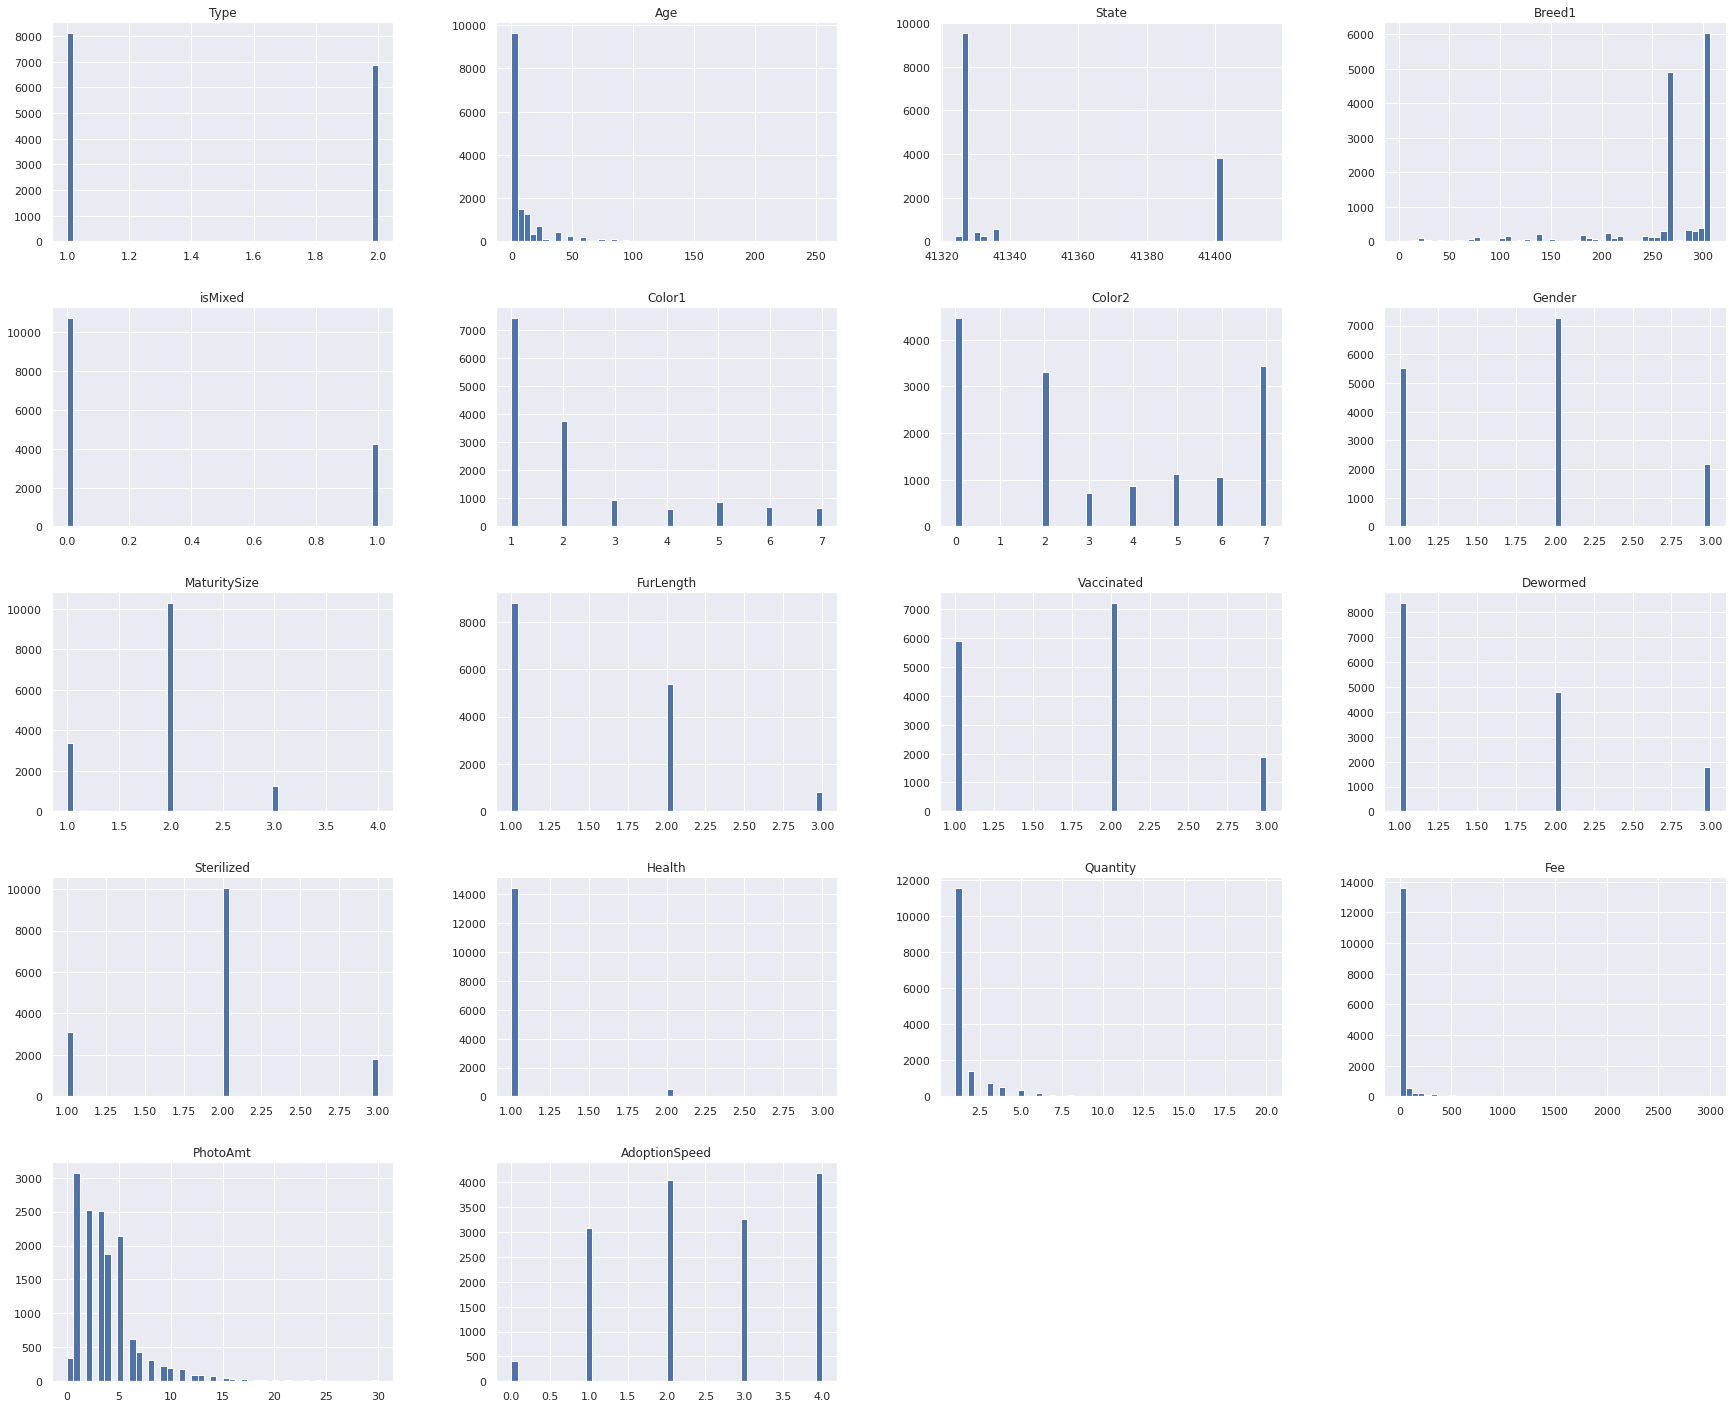

In [63]:
mainFrame.hist(bins=50, figsize=(30,25))
plt.show()

We have to take into consideration the following notations:
* For health: 1 = Yes, 2 = No, 3 = Not Sure
* For gender: 1 = Male, 2 = Female, 3 = Mixed (multiple pets in the photos)
* For maturity size: 1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large.

We can make the following observations based on the histograms: 

*   There is no error regarding the types: we have only two types of pets: cats and dogs, denoted with  1 and 2.
*   There are a significant number of pets with 0 months, therefore we expect our model to have better predictions for that category of pets. 
*   We can see that our data is significantly different for states, therefore we expect adoption to be more efficient for a specific state. Also, we can assume that it will be the same in case of some specific breeds, because pets are not uniformly distributed through them.
*   Regarding the quantity - there are considerably more entries with only one pet therefore our model will be better trained for that type of data. 
*  From the Fee histogram we can see that more than 85% of the pets have no fee, therefore our model will not be very accurate if we enter a fee since less than 10% of the data contains a fee greater than 0. 



# **Age**
Next, we will take a look at the age property of pets, how fast the two types of pets (dogs - 1 and cats - 2) are adopted based on their age and how it can influence the further adoptions.

In [64]:
mainFrame['Age'].value_counts().head(10)

2     3501
1     2304
3     1965
4     1108
12     967
24     651
5      595
6      558
36     417
8      309
Name: Age, dtype: int64

We can see that most pets in our data frame are young - maybe even new-borns (1-2 months). Also there a lot of pets with an age equal to multiples of 12, so we can deduce that probably owners don't really want to know the exact age, only an approximation.

> For the next plot, we chose a violin type because we want to observe the distribution of numeric data (age, in our case) and to make a comparison of distributions between multiple groups (the 5 values of the adoptionSpeed), but also separated by type - dogs(type 1) and cats(type 2).





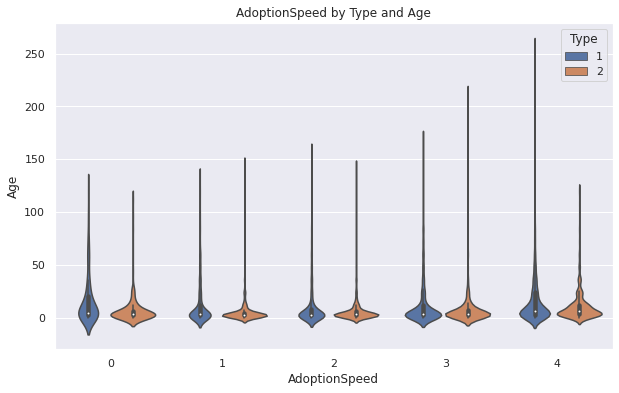

In [65]:
plt.figure(figsize=(10, 6));
plot = sns.violinplot(x="AdoptionSpeed", y="Age", hue="Type", data=mainFrame);
plt.title('AdoptionSpeed by Type and Age');


# **Type and Gender** 
(1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Firstly, we can say that the pets are distributed almost equally in our data frame (54,23% of pets are dogs and 45,73% cats). 

In [66]:
mainFrame['Type'].value_counts().head(2)

1    8128
2    6860
Name: Type, dtype: int64

Text(0.5, 1.0, 'Pets by type')

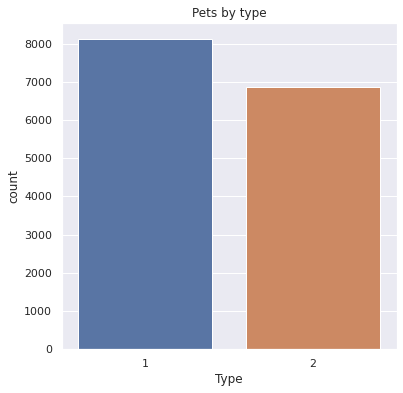

In [67]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( x ='Type', data=mainFrame)
chart.set_title("Pets by type")

Given the next plot, we cannot take any conclusion based on which gender has a better adoption speed, because, as we can see, there are more females than males in all 5 categories for adoptionSpeed (it is not possible to claim that females has the best adoption rate and the worst adoption rate at the same time), so our model will not behave very accurately when it comes to predicting the adoption speed based on gender.

Text(0.5, 1.0, 'Adoption Speed by Gender')

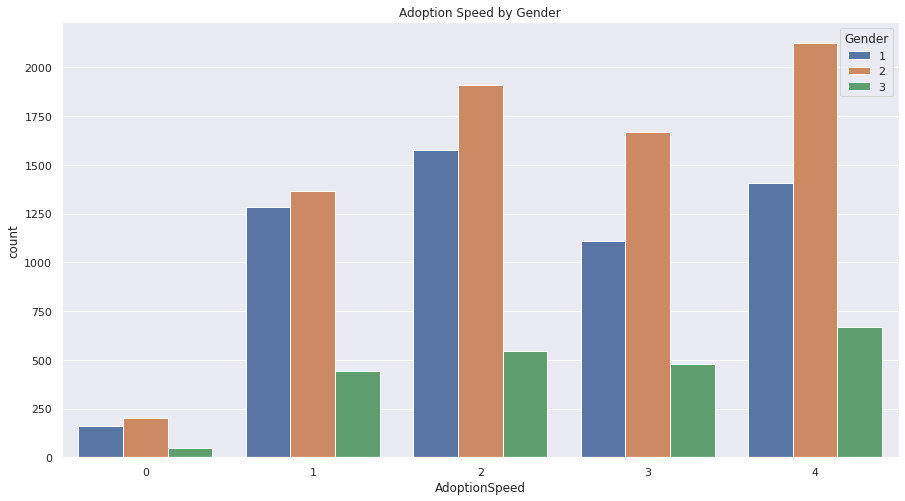

In [68]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( x ='AdoptionSpeed', hue="Gender", data=mainFrame)
chart.set_title("Adoption Speed by Gender")
#legend_labels = chart.get_legend_handles_labels()
#line_up, = plt.plot([1,2,3], label='Male')
#line_down, = plt.plot([3,2,1], label='Female')
#chart.legend(handles=[line_up, line_down], title = 'Gender')

### **Maturity size** 
(1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large)

Let's see first how many pets of each category we have:

In [69]:
mainFrame['MaturitySize'].value_counts().head(4)

2    10302
1     3393
3     1260
4       33
Name: MaturitySize, dtype: int64

We observe that we only have 33 pets with size at maturity equal to 4.

Text(0.5, 1.0, 'Adoption Speed by Maturity')

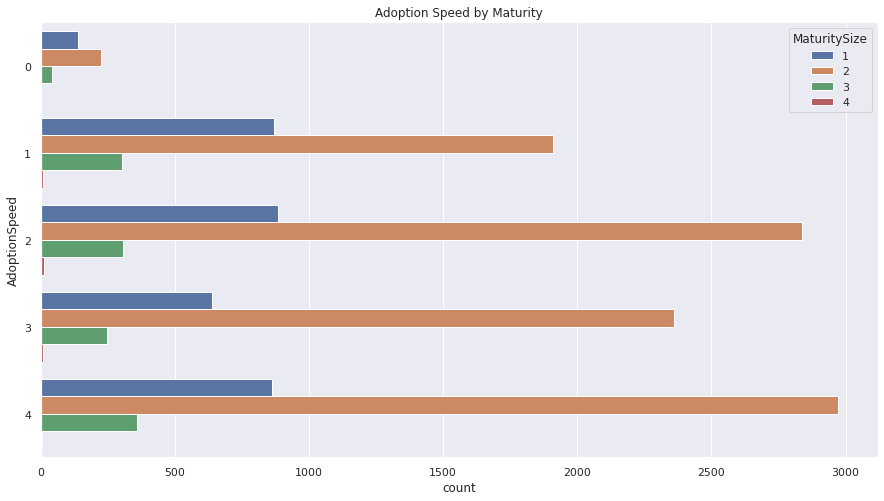

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( y ='AdoptionSpeed', hue="MaturitySize", data=mainFrame)
chart.set_title("Adoption Speed by Maturity")


### **Breed**
Let's take a look first at how having a secondary breed influences adoption speed (being mixed in our case):

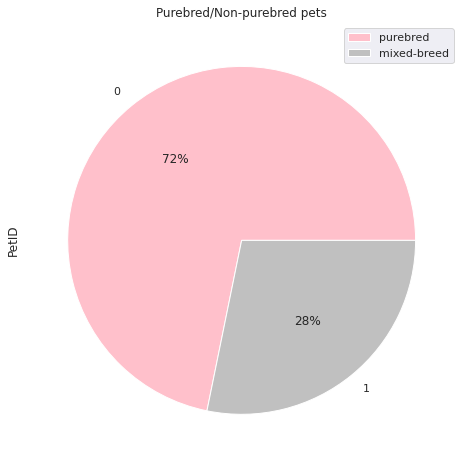

In [81]:
colors = ['pink', 'silver']
ax = mainFrame.groupby(['isMixed']).count().plot(kind='pie', y='PetID', 
                                                 autopct='%1.0f%%', 
                                                 colors=colors, 
                                                 title = 'Purebred/Non-purebred pets')
ax.legend(["purebred", "mixed-breed"]);

From the chart above we can observe that: 
* 

In [48]:
# use this in case you want to reset everything!!!
mainFrame.drop(mainFrame.index, inplace=True)